# Explore here

In [ ]:
import os
import pandas as pd
#import seaborn as sns
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# load the .env file variables
load_dotenv()

#client_id = os.environ.get("CLIENT_ID")
#client_secret = os.environ.get("CLIENT_SECRET")
SpotifyClientCredentials()

spotipy.Spotify()

ID_rada="1FuC6w5K3iO32aU8k4TiPA"

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())
results = spotify.artist_top_tracks(ID_rada)

track_data = []

for track in results['tracks'][:10]:
    name = track['name']
    popularity = track['popularity']
    duration_ms = track['duration_ms']
    # Convertir la duración de milisegundos a minutos y segundos
    minutes = duration_ms // 60000
    seconds = (duration_ms % 60000) // 1000
    duration = f"{minutes}m {seconds}s"  # Duración en formato legible
    

    # Agregar los datos de la canción al diccionario
    track_data.append({
        'Track Name': name,
        'Popularity': popularity,
        'Duration (ms)':duration_ms,
        'Duration': duration})

# Crear el DataFrame a partir de la lista de diccionarios
df_tracks = pd.DataFrame(track_data)

# Ordenar el DataFrame por popularidad en orden descendente
# NOTA: Aunque el ejercicio pide que lo ordenemos de forma ascendente, 
# lo hice al revés para que me quede el top 3 de las canciones más populares.
df_tracks_sorted = df_tracks.sort_values(by='Popularity', ascending=False)

# Muestra el top 3 de las canciones más populares. 
print("Las canciones más populares de Soy Rada and the Colibriquis son:")
df_tracks_sorted.head(3)





Las canciones más populares de Radagast and the Colibriquis son:


,Track Name,Popularity,Duration (ms),Duration
0,UVA UVA,35,190495,3m 10s
1,Avisame Cuando Llegues,28,211521,3m 31s
2,Cara de Culo,25,146116,2m 26s


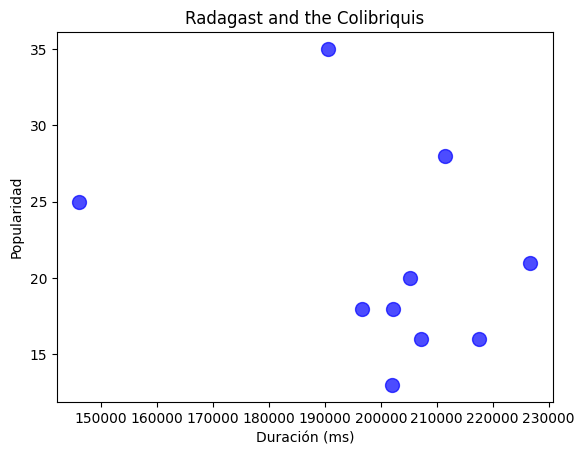

In [ ]:
import matplotlib.pyplot as plt

x=df_tracks["Duration (ms)"]
y=df_tracks["Popularity"]

# Crear scatter plot
plt.scatter(x, y, color='b', s=100, alpha=0.7)

# Etiquetas y título
plt.xlabel("Duración (ms)")
plt.ylabel("Popularidad")
plt.title("Radagast and the Colibriquis")

# Mostrar la gráfica
plt.show()




No parece haber una relación directa entre la popularidad y la duración de las canciones.